[2025-03-21 Fiddler](https://thefiddler.substack.com/p/can-you-play-the-favorite)
====================

Fiddler
-------
The probability that the 1-seed wins its 3rd round game is 4/5, so the probability that
the 4-seed wins is 1/5.

The probability that the 2-seed wins its 3rd round game is 3/5, and the probability that
the 3-seed wins is 2/5.

So the matchup probabilities are 12/25 for 1 vs. 2, 8/25 for 1 vs. 3, 3/25 for 4 vs. 2,
and 2/25 for 4 vs. 3.

The probability that the 1-seed wins is $12/25\cdot2/3 + 8/25\cdot3/4 = 14/25 = 56\%$.

Extra credit
------------
First, write code to get the answers for specific cases to be able to check my reasoning.

In [1]:
def matchup(a, b):
    result = {}
    for a_seed in a:
        a_prob = a[a_seed]
        for b_seed in b:
            b_prob = b[b_seed]
            a_win_prob = a_prob*b_prob*b_seed/(a_seed+b_seed)
            b_win_prob = a_prob*b_prob*a_seed/(a_seed+b_seed)
            if a_seed in result:
                result[a_seed] += a_win_prob
            else:
                result[a_seed] = a_win_prob
            if b_seed in result:
                result[b_seed] += b_win_prob
            else:
                result[b_seed] = b_win_prob
    return result

def tournament(k):
    teams = [{i:1} for i in [1..2^k]]
    for round in [1..k]:
        teams = [matchup(teams[i],teams[2^(k+1-round)-1-i]) for i in [0..2^(k-round)-1]]
    return teams

In [2]:
tournament(2)

[{1: 14/25, 2: 6/25, 3: 22/175, 4: 13/175}]

The case of the 4 top seeds checks out.  Just for the hell of it, look at the result for
the field of 16.

In [3]:
tournament(4)

[{1: 806481824235943136/1553261390448665625,
  2: 8112587175380884/37551374274583125,
  3: 330164230586256512/3091729815274010625,
  6: 27113113747285067/1243799350972303125,
  11: 959028832152704896/261067395240794953125,
  14: 253361513519951534141/154663784009082381515625,
  7: 129913942691406976/9275189445822031875,
  10: 4876010607743202/1005592929816395375,
  15: 1231170459862262272/983503036775703349125,
  4: 2208261746638440914/38955795672452533875,
  5: 62257856387118784/1855037889164406375,
  12: 990878802476191/371524481459259375,
  13: 101871679913217579328/49968299449088154028125,
  8: 395554377759384814/45251681841737791875,
  9: 3636369093385456864/592581547927518703125,
  16: 20928495968907921002/23162209199427796265625}]

In [4]:
t = [tournament(k)[0][1] for k in [0..9]]

In [5]:
for k in [0..9]:
    if k < 6:
        print(f"{2^k} {numerical_approx(t[k])} {t[k]}")
    else:
        print(f"{2^k} {numerical_approx(t[k])}")

1 1.00000000000000 1
2 0.666666666666667 2/3
4 0.560000000000000 14/25
8 0.527940159215879 225148/426465
16 0.519218355130161 806481824235943136/1553261390448665625
32 0.516694399261970 25158334187697207576521990998269142010611518221436594287497776032/48690936506438924161591769842887713908466104978748194801965193125
64 0.515833745724985
128 0.515544566634176
256 0.515459230037905
512 0.515437219149808


I'll speculate that the probability approaches something like 51.5%.

[An alternate implementation](20250321.go) of the same calculation going up to $k=15$ suggests
that the probability approaches 51.5431%.

    $ time go run 20250321.go
    Round 1 (2): 2.000000
    k=1, p=0.666667
    Round 1 (4): 4.000000
    Round 2 (2): 2.000000
    k=2, p=0.560000
    Round 1 (8): 8.000000
    Round 2 (4): 4.000000
    Round 3 (2): 2.000000
    k=3, p=0.527940
    k=4, p=0.519218
    k=5, p=0.516694
    k=6, p=0.515834
    k=7, p=0.515545
    k=8, p=0.515459
    k=9, p=0.515437
    k=10, p=0.515432
    k=11, p=0.515431
    k=12, p=0.515431
    k=13, p=0.515431
    k=14, p=0.515431
    k=15, p=0.515431


In the first round, the 1-seed faces the $2^k$.  The probability that the 1-seed wins is $\frac{2^k}{1+2^k}$.

In the second round, the 1-seed faces either the $2^{k-1}$ seed or the $2^{k-1}+1$ seed, with probability
$\frac{2^{k-1}+1}{2^k+1}$ or $\frac{2^{k-1}}{2^k+1}$.  The probability of winning is
$\frac{(2^{k-1}+1)2^{k-1}}{1+2^k}\left(\frac{1}{2^{k-1}+1}+\frac{1}{2^{k-1}+2}\right)$.

For a lower bound, consider the probability when the 1-seed faces the highest possible seed
for each matchup.

$$ p_L = \prod_{i=1}^k \frac{2^{k+1-i}}{2^{k+1-i}+1} $$

In [6]:
j,k = var("j,k")
pl1(k) = product(2^(k+1-j)/(2^(k+1-j)+1), j, 1, k)

In [7]:
[(2^i,pl1(i).simplify(), numerical_approx(pl1(i).simplify())) for i in [0..12]]

[(1, 1, 1.00000000000000),
 (2, 2/3, 0.666666666666667),
 (4, 8/15, 0.533333333333333),
 (8, 64/135, 0.474074074074074),
 (16, 1024/2295, 0.446187363834423),
 (32, 32768/75735, 0.432666534627319),
 (64, 2097152/4922775, 0.426010126402283),
 (128, 268435456/635037975, 0.422707722321645),
 (256, 68719476736/163204759575, 0.421062945191989),
 (512, 35184372088832/83724041661975, 0.420242159723779),
 (1024, 36028797018963968/85817142703524375, 0.419832167372829),
 (2048, 73786976294838206464/175839325399521444375, 0.419627271244291),
 (4096, 302231454903657293676544/720413716161839357604375, 0.419524848185652)]

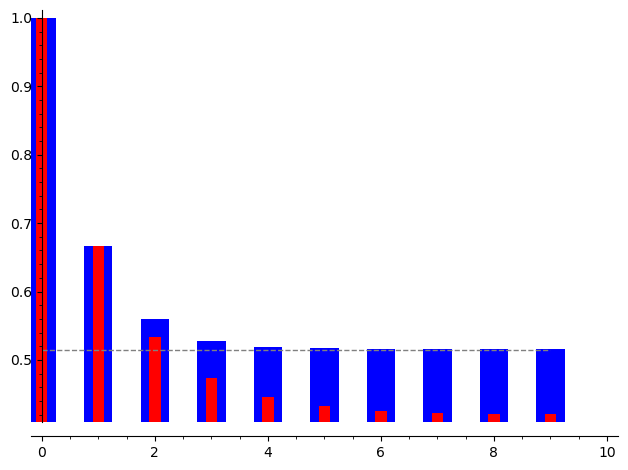

In [8]:
(bar_chart(t)
 + bar_chart([numerical_approx(pl1(i).simplify()) for i in [0..9]], color='red', width=0.2)
 + line([(0,0.515),(9,0.515)],linestyle='dashed',color='gray')
)

The most likely upsets in each round are 3 over 2, 5 over 4, 9 over 8, etc, so considering
those gives the next approximation to the lower bound, where the error from adding the
possibility of facing the $2^k+1$ seed in the first round should become negligible with large $k$,

In [9]:
pl2(k) = product(2^(k+1-j)/(2^(k+1-j)+1)*(2^(k+2-j)+1-2^(k+1-j))/(2^(k+2-j)+1)
                + (2^(k+1-j)+1)/(2^(k+1-j)+2)*(2^(k+2-j)+1-2^(k+1-j)-1)/(2^(k+2-j)+1), j, 1, k)

In [10]:
numerical_approx(pl2(12).simplify())

0.452333213984167

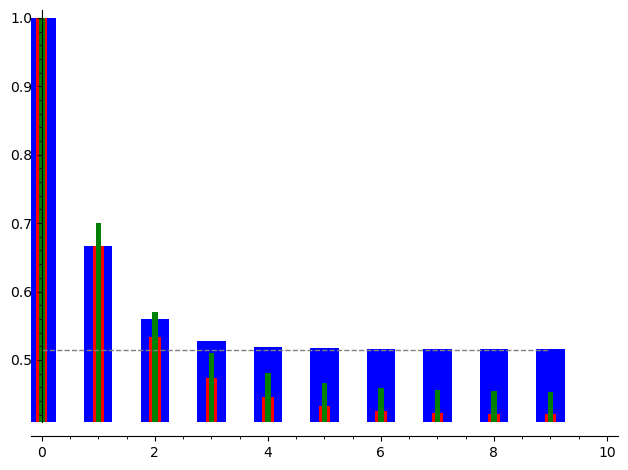

In [11]:
(bar_chart(t)
 + bar_chart([numerical_approx(pl1(i).simplify()) for i in [0..9]], color='red', width=0.2)
 + bar_chart([numerical_approx(pl2(i).simplify()) for i in [0..9]], color='green', width=0.1)
 + line([(0,0.515),(9,0.515)],linestyle='dashed',color='gray')
)

After the $2^{k+1-j}$ seed and the $2^{k+1-j}+1$ seed, the next most likely opponents
of the 1-seed in round $j$ are the $2^{k+3-j}+1-2^{k+1-j}$ seed
and the $2^{k+3-j}-2^{k+1-j}$ seed.

In [12]:
s2(k,j) = 2^(k+1-j)
s3(k,j) = 2^(k+1-j)+1
s6(k,j) = 2^(k+3-j)+1-s3(k,j)
s7(k,j) = 2^(k+3-j)+1-s2(k,j)
w(a,b) = b/(a+b)
pl1(k) = product(w(1,s2(k,j)),j,1,k)
pl2(k) = product(w(1,s2(k,j))*w(s2(k,j),s3(k,j))+w(1,s3(k,j))*w(s3(k,j),s2(k,j)),j,1,k)
pl3(k) = product(
    w(1,s2(k,j))*w(s2(k,j),s7(k,j))*(
        w(s2(k,j),s3(k,j))*w(s3(k,j),s6(k,j)) +
        w(s2(k,j),s6(k,j))*w(s6(k,j),s3(k,j))) +
    w(1,s3(k,j))*w(s3(k,j),s6(k,j))*(
        w(s3(k,j),s2(k,j))*w(s2(k,j),s7(k,j)) +
        w(s3(k,j),s7(k,j))*w(s7(k,j),s2(k,j))) +
    w(1,s6(k,j))*w(s6(k,j),s3(k,j))*(
        w(s6(k,j),s2(k,j))*w(s2(k,j),s7(k,j)) +
        w(s6(k,j),s7(k,j))*w(s7(k,j),s2(k,j))) +
    w(1,s7(k,j))*w(s7(k,j),s2(k,j))*(
        w(s7(k,j),s3(k,j))*w(s3(k,j),s6(k,j)) +
        w(s7(k,j),s6(k,j))*w(s6(k,j),s3(k,j))),
    j,1,k)

In [13]:
[(2^k,pl1(k).simplify(),numerical_approx(pl1(k).simplify())) for k in [1..9]]

[(2, 2/3, 0.666666666666667),
 (4, 8/15, 0.533333333333333),
 (8, 64/135, 0.474074074074074),
 (16, 1024/2295, 0.446187363834423),
 (32, 32768/75735, 0.432666534627319),
 (64, 2097152/4922775, 0.426010126402283),
 (128, 268435456/635037975, 0.422707722321645),
 (256, 68719476736/163204759575, 0.421062945191989),
 (512, 35184372088832/83724041661975, 0.420242159723779)]

In [14]:
numerical_approx(pl1(15).simplify())

0.419435241682449

In [15]:
[(2^k,pl2(k).simplify(),numerical_approx(pl2(k).simplify())) for k in [1..9]]

[(2, 7/10, 0.700000000000000),
 (4, 77/135, 0.570370370370370),
 (8, 5852/11475, 0.509978213507625),
 (16, 29792/61965, 0.480787541353990),
 (32, 31937024/68471325, 0.466429180390477),
 (64, 133880004608/291482430525, 0.459307287807583),
 (128, 2219194956382208/4869214001920125, 0.455760407225292),
 (256, 1539887700260159488/3391894473737559075, 0.453990450523463),
 (512, 31142688850061465485312/68731523211101269179375, 0.453106338912498)]

In [16]:
numerical_approx(pl2(15).simplify())

0.452236604348383

In [17]:
[(2^k,pl3(k).simplify(),numerical_approx(pl3(k).simplify())) for k in [1..4]]

[(2, 5117/7020, 0.728917378917379),
 (4, 543821/895050, 0.607587285626501),
 (8, 967345531874/1759188105675, 0.549881805563271),
 (16, 44326504054248692176/84970199137401703125, 0.521671180063615)]

In [18]:
numerical_approx(pl3(15).simplify())

0.493856373069734

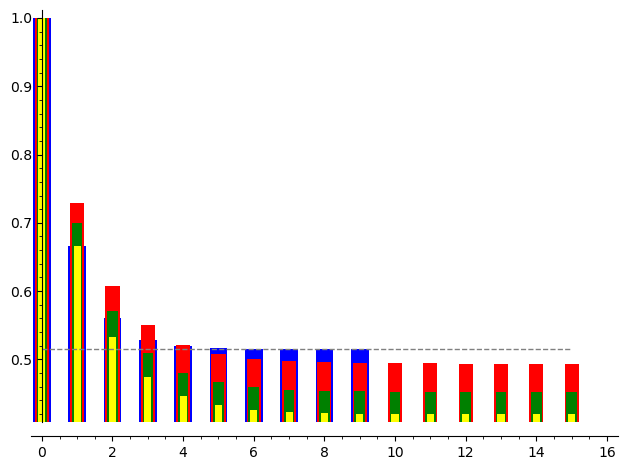

In [19]:
(bar_chart(t)
 + bar_chart([numerical_approx(pl3(i).simplify()) for i in [0..15]], color='red', width=0.4)
 + bar_chart([numerical_approx(pl2(i).simplify()) for i in [0..15]], color='green', width=0.3)
 + bar_chart([numerical_approx(pl1(i).simplify()) for i in [0..15]], color='yellow', width=0.2)
 + line([(0,0.515),(15,0.515)],linestyle='dashed',color='gray')
)

It's straightforward, but tedious, to consider the next 4 most likely seed-1 opponents
in round $j$.

However, without being able to come up with a simple expression for what the probability approaches
when $k$ is large, this exercise is less valuable.

Even better would be able to parameterize the number of rounds of possible upsets in a simple expression
and let that number get large.

In [20]:
s10(k,j) = 2^(k+4-j)+1-s7(k,j)
s11(k,j) = 2^(k+4-j)+1-s6(k,j)
s14(k,j) = 2^(k+4-j)+1-s3(k,j)
s15(k,j) = 2^(k+4-j)+1-s2(k,j)

pl4_s2_1(k,j) = w(s2(k,j),s15(k,j))*(
    w(s2(k,j),s7(k,j))*w(s7(k,j),s10(k,j)) +
    w(s2(k,j),s10(k,j))*w(s10(k,j),s7(k,j)))
pl4_s3_1(k,j) = w(s3(k,j),s14(k,j))*(
    w(s3(k,j),s6(k,j))*w(s6(k,j),s11(k,j)) +
    w(s3(k,j),s11(k,j))*w(s11(k,j),s6(k,j)))
pl4_s6_1(k,j) = w(s6(k,j),s11(k,j))*(
    w(s6(k,j),s3(k,j))*w(s3(k,j),s14(k,j)) +
    w(s6(k,j),s14(k,j))*w(s14(k,j),s3(k,j)))
pl4_s7_1(k,j) = w(s7(k,j),s10(k,j))*(
    w(s7(k,j),s2(k,j))*w(s2(k,j),s15(k,j)) +
    w(s7(k,j),s15(k,j))*w(s15(k,j),s2(k,j)))
pl4_s10_1(k,j) = w(s10(k,j),s7(k,j))*(
    w(s10(k,j),s2(k,j))*w(s2(k,j),s15(k,j)) +
    w(s10(k,j),s15(k,j))*w(s15(k,j),s2(k,j)))
pl4_s11_1(k,j) = w(s11(k,j),s6(k,j))*(
    w(s11(k,j),s3(k,j))*w(s3(k,j),s14(k,j)) +
    w(s11(k,j),s14(k,j))*w(s14(k,j),s3(k,j)))
pl4_s14_1(k,j) = w(s14(k,j),s3(k,j))*(
    w(s14(k,j),s6(k,j))*w(s6(k,j),s11(k,j)) +
    w(s14(k,j),s11(k,j))*w(s11(k,j),s6(k,j)))
pl4_s15_1(k,j) = w(s15(k,j),s2(k,j))*(
    w(s15(k,j),s7(k,j))*w(s7(k,j),s10(k,j)) +
    w(s15(k,j),s10(k,j))*w(s10(k,j),s7(k,j)))

pl4_s2(k,j) = pl4_s2_1(k,j)*(
    w(s2(k,j),s3(k,j))*pl4_s3_1(k,j) +
    w(s2(k,j),s6(k,j))*pl4_s6_1(k,j) +
    w(s2(k,j),s11(k,j))*pl4_s11_1(k,j) +
    w(s2(k,j),s14(k,j))*pl4_s14_1(k,j))
pl4_s3(k,j) = pl4_s3_1(k,j)*(
    w(s3(k,j),s2(k,j))*pl4_s2_1(k,j) +
    w(s3(k,j),s7(k,j))*pl4_s7_1(k,j) +
    w(s3(k,j),s10(k,j))*pl4_s10_1(k,j) +
    w(s3(k,j),s15(k,j))*pl4_s15_1(k,j))
pl4_s6(k,j) = pl4_s6_1(k,j)*(
    w(s6(k,j),s2(k,j))*pl4_s2_1(k,j) +
    w(s6(k,j),s7(k,j))*pl4_s7_1(k,j) +
    w(s6(k,j),s10(k,j))*pl4_s10_1(k,j) +
    w(s6(k,j),s15(k,j))*pl4_s15_1(k,j))
pl4_s7(k,j) = pl4_s7_1(k,j)*(
    w(s7(k,j),s3(k,j))*pl4_s3_1(k,j) +
    w(s7(k,j),s6(k,j))*pl4_s6_1(k,j) +
    w(s7(k,j),s11(k,j))*pl4_s11_1(k,j) +
    w(s7(k,j),s14(k,j))*pl4_s14_1(k,j))
pl4_s10(k,j) = pl4_s10_1(k,j)*(
    w(s10(k,j),s3(k,j))*pl4_s3_1(k,j) +
    w(s10(k,j),s6(k,j))*pl4_s6_1(k,j) +
    w(s10(k,j),s11(k,j))*pl4_s11_1(k,j) +
    w(s10(k,j),s14(k,j))*pl4_s14_1(k,j))
pl4_s11(k,j) = pl4_s11_1(k,j)*(
    w(s11(k,j),s2(k,j))*pl4_s2_1(k,j) +
    w(s11(k,j),s7(k,j))*pl4_s7_1(k,j) +
    w(s11(k,j),s10(k,j))*pl4_s10_1(k,j) +
    w(s11(k,j),s15(k,j))*pl4_s15_1(k,j))
pl4_s14(k,j) = pl4_s14_1(k,j)*(
    w(s14(k,j),s2(k,j))*pl4_s2_1(k,j) +
    w(s14(k,j),s7(k,j))*pl4_s7_1(k,j) +
    w(s14(k,j),s10(k,j))*pl4_s10_1(k,j) +
    w(s14(k,j),s15(k,j))*pl4_s15_1(k,j))
pl4_s15(k,j) = pl4_s15_1(k,j)*(
    w(s15(k,j),s3(k,j))*pl4_s3_1(k,j) +
    w(s15(k,j),s6(k,j))*pl4_s6_1(k,j) +
    w(s15(k,j),s11(k,j))*pl4_s11_1(k,j) +
    w(s15(k,j),s14(k,j))*pl4_s14_1(k,j))

pl4(k) = product(
    w(1,s2(k,j))*pl4_s2(k,j) +
    w(1,s3(k,j))*pl4_s3(k,j) +
    w(1,s6(k,j))*pl4_s6(k,j) +
    w(1,s7(k,j))*pl4_s7(k,j) +
    w(1,s10(k,j))*pl4_s10(k,j) +
    w(1,s11(k,j))*pl4_s11(k,j) +
    w(1,s14(k,j))*pl4_s14(k,j) +
    w(1,s15(k,j))*pl4_s15(k,j),
    j,1,k)

In [21]:
[(2^k,numerical_approx(pl4(k).simplify())) for k in [1..15]]

[(2, 0.740208276503313),
 (4, 0.621862480629516),
 (8, 0.565043095022218),
 (16, 0.537129052485178),
 (32, 0.523281564909573),
 (64, 0.516383170232246),
 (128, 0.512940038397114),
 (256, 0.511219953691910),
 (512, 0.510360277169097),
 (1024, 0.509930529800999),
 (2048, 0.509715678769444),
 (4096, 0.509608258907917),
 (8192, 0.509554550389606),
 (16384, 0.509527696483424),
 (32768, 0.509514269618559)]

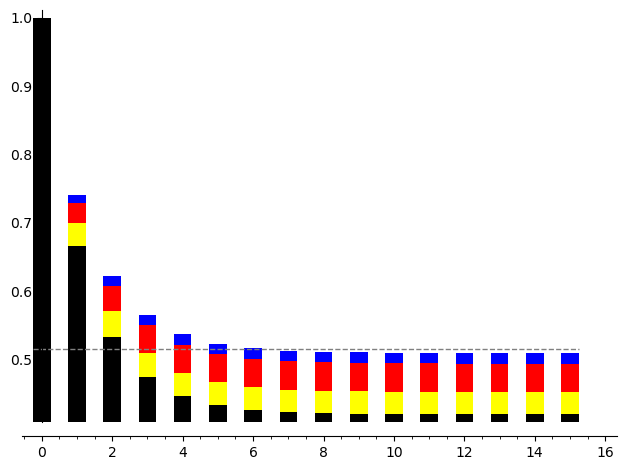

In [22]:
(bar_chart([numerical_approx(pl4(i).simplify()) for i in [0..15]])
 + bar_chart([numerical_approx(pl3(i).simplify()) for i in [0..15]], color='red')
 + bar_chart([numerical_approx(pl2(i).simplify()) for i in [0..15]], color='yellow')
 + bar_chart([numerical_approx(pl1(i).simplify()) for i in [0..15]], color='black')
 + line([(-0.25,0.515),(15.25,0.515)],linestyle='dashed',color='gray')
)